----------------------

# Анализ сервиса по прокату самокатов

<b> Описание проекта</b> 

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

1) без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

2) с подпиской Ultra

- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

<b>  Описание данных</b> 

1) Пользователи — users_go.csv

- user_id — уникальный идентификатор пользователя
- name — имя пользователя
- age — возраст
- city — город
- subscription_type — тип подписки (free, ultra)

2) Поeздки — rides_go.csv

- user_id — уникальный идентификатор пользователя
- distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date — дата совершения поездки

3) Подписки — subscriptions_go.csv

- subscription_type — тип подписки
- minute_price — стоимость одной минуты поездки по данной подписке
- start_ride_price — стоимость начала поездки
- subscription_fee — стоимость ежемесячного платежа

Подключение библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

Загрузка данных: пользователи

In [7]:
try:    
    data_users = pd.read_csv('/datasets/users_go.csv')
except FileNotFoundError:
    data_users=pd.read_csv('users_go.csv')

Информация о данных: пользователи

In [8]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Просмотр первых строчек данных

In [5]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Загрузка данных: поездки

In [6]:
try:    
    data_rides = pd.read_csv('/datasets/rides_go.csv')
except FileNotFoundError:
    data_rides=pd.read_csv('rides_go.csv')

Информация о данных: поездки

In [7]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Просмотр первых строчек данных

In [8]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Максимальная дистанция поездки

In [9]:
data_rides['distance'].max()

7211.007744598519

Минимальная дистанция поездки

In [10]:
data_rides['distance'].min()

0.855682925681208

5 самых коротких поездок

In [11]:
data_rides['distance'].sort_values().head()

11555    0.855683
9541     2.570787
13690    4.329506
8658     6.784447
7841     7.097072
Name: distance, dtype: float64

5 самых длинных поездок

In [12]:
data_rides['distance'].sort_values(ascending=False).head()

16309    7211.007745
16484    7066.003772
15580    6908.491343
17171    6760.940067
17242    6724.932981
Name: distance, dtype: float64

Средняя продолжительность поездок

In [13]:
data_rides['duration'].mean()

17.80501119798444

5 самых минимальных по продолжительности поездок

In [14]:
data_rides['duration'].sort_values().head()

12013    0.5
17314    0.5
15029    0.5
7437     0.5
12967    0.5
Name: duration, dtype: float64

Количество уникальных значений в столбце: продолжительность поездок

In [15]:
duration_rides = data_rides['duration'].value_counts()
duration_rides

0.500000     95
22.184080     1
25.866000     1
22.837062     1
19.173800     1
             ..
18.843765     1
17.644888     1
22.477965     1
19.745218     1
16.537044     1
Name: duration, Length: 17974, dtype: int64

5 самых длинных поездок

In [16]:
data_rides['duration'].sort_values(ascending=False).head()

4215    40.823963
4709    39.873856
2623    39.526602
1998    38.352763
6453    38.265229
Name: duration, dtype: float64

Загрузка данных: подписки

In [17]:
try:    
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
except FileNotFoundError:
    data_subscriptions=pd.read_csv('subscriptions_go.csv')

Информация по данным: подписки

In [18]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Просмотр строк по данным: подписки

In [19]:
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Соотношение пользователей с подпиской и без

In [20]:
subscription_percent = data_users['subscription_type'].value_counts(normalize=True) * 100
subscription_percent

free     54.057508
ultra    45.942492
Name: subscription_type, dtype: float64

Загрузили и изучили наборы данных.
- У людей от 17 до 30 лет данное приложение имеет наибольшую популярность
- Максимальная дистанция поездки 7211
- Минимальная дистанция поездки 0.9
- Максимальная продолжительность поездки 41
- Минимальная продолжительность поездки 0.5
- Наибольшее количество людей, которые пользуются приложжением люди без подписки их 54 процента от общего количества

Наименование столбцов корректно. Тип данных не подходит в датафрейме data_rides столбец date, тип object нужно заменить на datetime.
Данные корректны, последовательны, правдоподобны.

#### Шаг 2. Предобработка данных

Количество дубликатов в данных о пользователях

In [21]:
data_users.duplicated().sum()

31

Удаление дубликатов и просмот количества после удаления

In [22]:
data_users.drop_duplicates(inplace=True)
data_users.duplicated().sum()

0

Количество дубликатов в данных о поездках

In [23]:
data_rides.duplicated().sum()

0

Просмотр первых строк в данных о поездках

In [24]:
data_rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Информация о данных 

In [25]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Изменение формата столбца "date" (object на datetime)

In [26]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')

Просмотр информации о данных после изменения типа

In [27]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Просмотр столбца "date"

In [28]:
data_rides['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

Проверка уникальных значений в столбце "date" по годам

In [29]:
data_rides['date'].dt.year.unique()

array([2021])

Создание столбика где содержаться данные в каком месяце была поездка

In [30]:
data_rides['date_month'] = data_rides['date'].dt.month

Просмотр первых строчек данных после добавления нового столбца

In [31]:
data_rides.head()

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверка на уникальность значений добавленного столбца, для определения использовались ли все месяца. Это показывает есть ли ошибки в данных значениях или нет

In [32]:
data_rides['date_month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Создание нового столбца где содержаться данные с датой поездки

In [33]:
data_rides['date_day'] = data_rides['date'].dt.day

Просмотр первых строчек данных после добавления нового столбца

In [34]:
data_rides.head()

,user_id,distance,duration,date,date_month,date_day
0,1,4409.919140,25.599769,2021-01-01,1,1
1,1,2617.592153,15.816871,2021-01-18,1,18
2,1,754.159807,6.232113,2021-04-20,4,20
3,1,2694.783254,18.511000,2021-08-11,8,11
4,1,4028.687306,26.265803,2021-08-28,8,28


Проверка на уникальность значений добавленного столбца, для определения использовались ли все существующие даты. Это показывает есть ли ошибки в данных значениях или нет

In [35]:
data_rides['date_day'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

Информация о данных с подписками

In [36]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Вывод строчек в данных о подписках

In [37]:
data_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


- Была произведена проверка на наличие пропусков в данных. Пропусков не обнаружено. 
- Были удалены строки дубликаты. 
- Были добавлены столбцы date_month и date_day показывающие месяц и день поездки.

#### Шаг 3. Исследовательский анализ данных

Вывод для наглядности первых строк в данных о пользователей

In [38]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Построение гистограммы для наглядного представления о возрастном разбросе пользователей сервиса

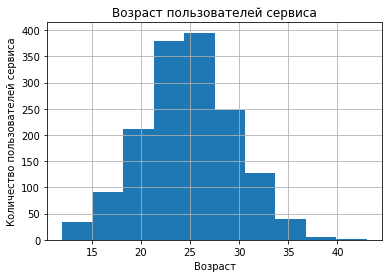

In [39]:
plt.hist(data_users['age'])
plt.title('Возраст пользователей сервиса')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей сервиса')
plt.grid()

Определния популярности приложения по городам

In [40]:
popularity_city = data_users['city'].value_counts()
popularity_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Определния популярности приложения по городам в процентах

In [41]:
popularity_city_percent = data_users['city'].value_counts(normalize=True) * 100
popularity_city_percent

Пятигорск         14.276402
Екатеринбург      13.298566
Ростов-на-Дону    12.907432
Краснодар         12.581486
Сочи              12.320730
Омск              11.929596
Тюмень            11.734029
Москва            10.951760
Name: city, dtype: float64

Округление дроби до десятых

In [42]:
popularity_city_percent = popularity_city_percent.round(1)
popularity_city_percent

Пятигорск         14.3
Екатеринбург      13.3
Ростов-на-Дону    12.9
Краснодар         12.6
Сочи              12.3
Омск              11.9
Тюмень            11.7
Москва            11.0
Name: city, dtype: float64

Для наглядности был построен график популярности в городах

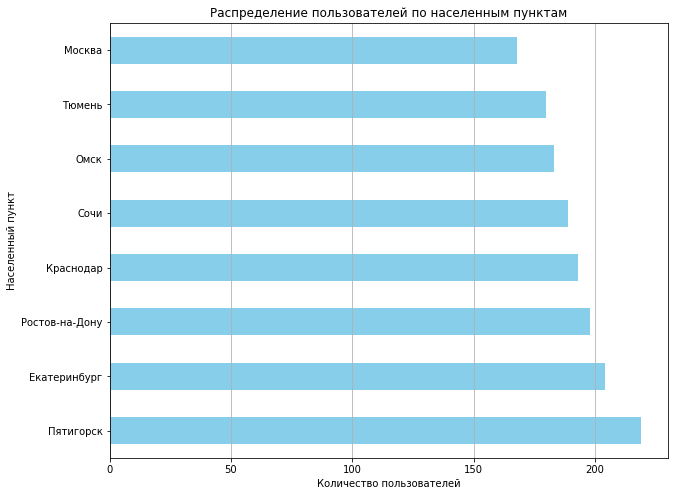

In [43]:
city_counts = data_users['city'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
city_counts.plot(kind='barh', color='skyblue')
plt.title('Распределение пользователей по населенным пунктам')
plt.xlabel('Количество пользователей')
plt.ylabel('Населенный пункт')
plt.grid(axis='x')

Количество людей без подписки и с подпиской

In [44]:
subscription = data_users['subscription_type'].value_counts()
subscription

free     835
ultra    699
Name: subscription_type, dtype: int64

Количество людей без подписки и с подпиской в процентном соотношении

In [45]:
subscription_percent = data_users['subscription_type'].value_counts(normalize=True) * 100
subscription_percent

free     54.432855
ultra    45.567145
Name: subscription_type, dtype: float64

Для наглядности построена круговая диаграмма процентного соотношения людей без подписки и с подпиской

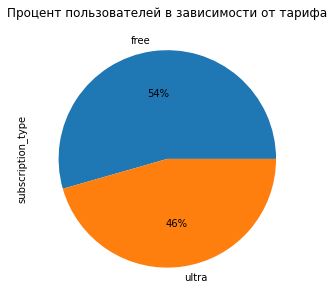

In [46]:
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = subscription_percent, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процент пользователей в зависимости от тарифа');

Описательная статистика для определения среднего максимального и минимального значения для столбика "возраст пользователей"

In [47]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Первые строки данных про поездки

In [48]:
data_rides.head()

,user_id,distance,duration,date,date_month,date_day
0,1,4409.919140,25.599769,2021-01-01,1,1
1,1,2617.592153,15.816871,2021-01-18,1,18
2,1,754.159807,6.232113,2021-04-20,4,20
3,1,2694.783254,18.511000,2021-08-11,8,11
4,1,4028.687306,26.265803,2021-08-28,8,28


Описательная статистика для определения среднего максимального и минимального значения для столбика "дистанция поездок"

In [49]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Описательная статистика для определения среднего максимального и минимального значения для столбика "продолжительность поездок"

In [50]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Сводная таблица показывающая дистанцию и продолжительность поездок

In [51]:
data_rides_grouped = data_rides.groupby('user_id').sum(numeric_only=True)[['distance', 'duration']]
data_rides_grouped

,distance,duration
user_id,,
1,34070.182066,204.604909
2,33964.058614,197.644279
3,36907.597866,233.193513
4,44837.189916,288.563581
5,35556.949649,174.073932
...,...,...
1530,46758.469822,292.366839
1531,67054.794222,408.192206
1532,33902.203192,212.160144


Гистограмма для визуализации расстояний за поездку

Text(0, 0.5, 'Количество поездок')

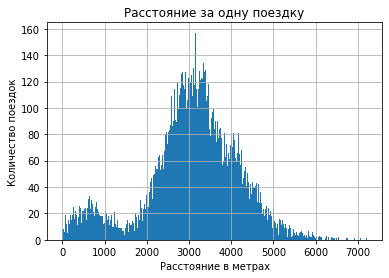

In [52]:
data_rides['distance'].hist(bins=500)
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')

Гистограмма для визуализации продолжительности поездок

Text(0, 0.5, 'Количество поездок')

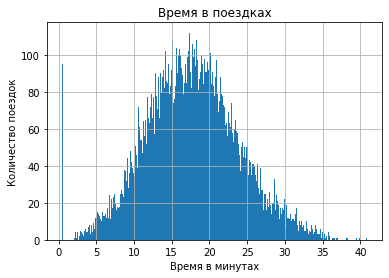

In [53]:
data_rides['duration'].hist(bins=500)
plt.title('Время в поездках')
plt.xlabel('Время в минутах')
plt.ylabel('Количество поездок')

- Минимальны возраст пользователей приложения 12 лет максимальный 43. Средний возраст использования 25 лет.
- 53 процента не пользуются подпиской сервиса 47 процентов подключили ее
- Наибольшее количество поездок совершено в Пятегорске 
- Наименьшее в Москве
- Среднее количество метров за 1 поездку 3071 метров 
- Максимальное 7211 метров
- Минимальное 0.85 метров
- Среднее время 17.8 минут 
- Максимальнок время 40.8 минут
- Минимальное 0.5 минут

#### Шаг 4. Объединение данных

Создание полного массива данных

In [54]:
full_data = data_users.merge(data_rides).merge(data_subscriptions)
full_data

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_day,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,18,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,20,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,11,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,28,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,4,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,16,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,18,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,27,8,50,0


Проверка на дубликаты нового датафрейма

In [55]:
full_data.duplicated().sum()

0

Проверка на пропущенные значения нового датафрейма

In [56]:
full_data.isnull().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
date_month           0
date_day             0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Создание таблицы для пользователей без подписки

In [57]:
free_sub = full_data.query("`subscription_type` == 'free'")
free_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_day,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,1,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,4,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,10,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,14,8,50,0


Создание таблицы для пользователей c подпиской

In [58]:
ultra_sub = full_data.query("`subscription_type` == 'ultra'")
ultra_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,date_day,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,18,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,20,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,11,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,28,6,0,199


Гисторгамма по всем данным для расстояния поездок

Text(0, 0.5, 'Количество поездок')

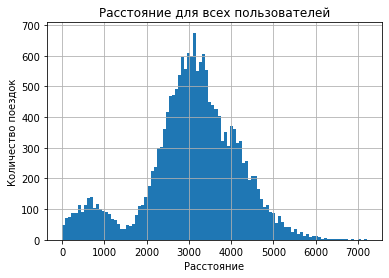

In [59]:
full_data['distance'].hist(bins=100)
plt.title('Расстояние для всех пользователей')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')

Гистограмма по всем данным для продолжительности поездок

Text(0, 0.5, 'Количество поездок')

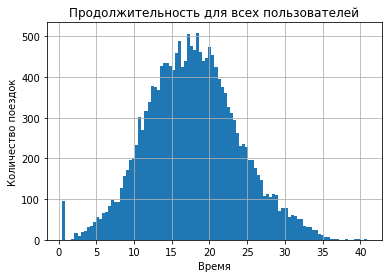

In [60]:
full_data['duration'].hist(bins=100)
plt.title('Продолжительность для всех пользователей')
plt.xlabel('Время')
plt.ylabel('Количество поездок')

Гистограмма расстояния для пользователей без подписки

Text(0, 0.5, 'Количество поездок')

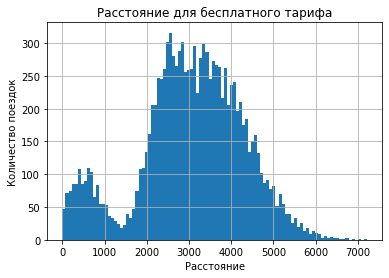

In [61]:
full_data.loc[full_data['subscription_type']=='free', 'distance'].hist(bins=100)
plt.title('Расстояние для бесплатного тарифа')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')

Гистограмма продолжительности для пользователей без подписки

Text(0, 0.5, 'Количество поездок')

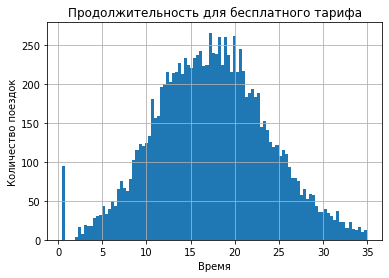

In [62]:
full_data.loc[full_data['subscription_type']=='free', 'duration'].hist(bins=100)
plt.title('Продолжительность для бесплатного тарифа')
plt.xlabel('Время')
plt.ylabel('Количество поездок')

Гистограмма продолжительности для пользователей c подпиской

Text(0, 0.5, 'Количество поездок')

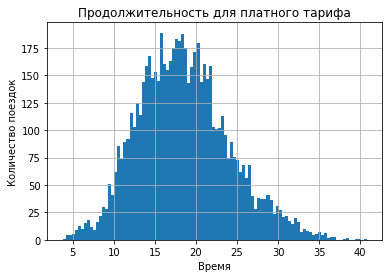

In [63]:
full_data.loc[full_data['subscription_type']=='ultra', 'duration'].hist(bins=100)
plt.title('Продолжительность для платного тарифа')
plt.xlabel('Время')
plt.ylabel('Количество поездок')

Гистограмма расстояния для пользователей c подпиской

Text(0, 0.5, 'Количество поездок')

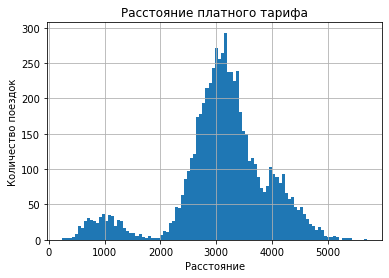

In [64]:
full_data.loc[full_data['subscription_type']=='ultra', 'distance'].hist(bins=100)
plt.title('Расстояние платного тарифа')
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')

Обьединенный график расстояния для платных и бесплатных подписок

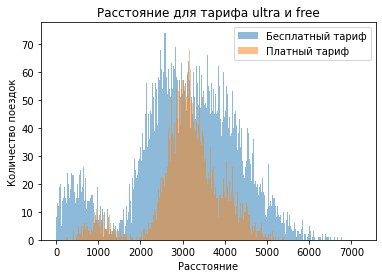

In [65]:
plt.hist(full_data.loc[full_data['subscription_type']=='free', 'distance'], 
         alpha=0.5,
         bins=500,
         label='Бесплатный тариф') 

plt.hist(full_data.loc[full_data['subscription_type']=='ultra', 'distance'],
         alpha=0.5,
         bins=500,
         label='Платный тариф') 
  
  
plt.legend(loc='upper right') 
plt.title('Расстояние для тарифа ultra и free') 
plt.xlabel('Расстояние')
plt.ylabel('Количество поездок')
plt.show()

Обьединенный график продолжительности поездок для платных и бесплатных подписок

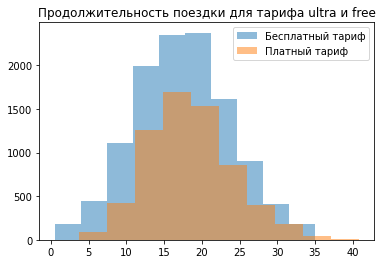

In [66]:
plt.hist(full_data.loc[full_data['subscription_type']=='free', 'duration'], 
         alpha=0.5,
         label='Бесплатный тариф') 

plt.hist(full_data.loc[full_data['subscription_type']=='ultra', 'duration'],
         alpha=0.5,
         label='Платный тариф') 
  
  
plt.legend(loc='upper right') 
plt.title('Продолжительность поездки для тарифа ultra и free') 
plt.show()

Было произведено соединение данных и построения графиков по столбикам distance, duration всего, с подпиской, без подписки. 
- У бесплатного тарифа среднее время поездки составляет 10-30 минут а дистанция 2-5 км.
- У платного тарифа среднее время поездки составляет 15-25 минут а дистанция 2.5-3.5 км.

Пользователи без подписки совершают в среднем более долгие и протяженные поездки

#### Шаг 5. Подсчёт выручки

Создадим таблицу для дальнейшего подсчета выручки

In [67]:
full_data['duration'] = np.ceil(full_data['duration'])
user_drive_in_month = full_data.pivot_table(
    index=('user_id', 'date_month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ), 
    aggfunc=('count', 'sum'))

user_drive_in_month.columns = [
    'count', 'distance', 
    'count2', 'duration', 
    'count3', 'minute_price',
    'count4', 'start_ride_price', 
    'count5', 'subscription_fee'
]
user_drive_in_month = user_drive_in_month.drop(['count2', 'count3', 'count4', 'count5'], axis=1)
user_drive_in_month['start_ride_price'] = user_drive_in_month['start_ride_price'] / user_drive_in_month['count']
user_drive_in_month['minute_price'] = user_drive_in_month['minute_price'] / user_drive_in_month['count']
user_drive_in_month['subscription_fee'] = user_drive_in_month['subscription_fee'] / user_drive_in_month['count']

user_drive_in_month

count      distance  duration  minute_price  \
user_id date_month                                                
1       1               2   7027.511294      42.0           6.0   
        4               1    754.159807       7.0           6.0   
        8               2   6723.470560      46.0           6.0   
        10              2   5809.911100      32.0           6.0   
        11              3   7003.499363      56.0           6.0   
...                   ...           ...       ...           ...   
1534    6               2   3409.468534      26.0           8.0   
        8               2   7622.453034      48.0           8.0   
        9               1   4928.173852      23.0           8.0   
        11              4  13350.015305      78.0           8.0   
        12              1   2371.711192      16.0           8.0   

                    start_ride_price  subscription_fee  
user_id date_month                                      
1       1                        0.0             199.0  
        4                        0.0             199.0  
        8                        0.0             199.0  
        10                       0.0             199.0  
        11                       0.0             199.0  
...                              ...               ...  
1534    6                       50.0               0.0  
        8                       50.0               0.0  
        9                       50.0               0.0  
        11                      50.0               0.0  
        12                      50.0               0.0  

[11331 rows x 6 columns]

Таблица подсчета выручки

In [68]:
user_drive_in_month['revenue'] = (
    (user_drive_in_month['start_ride_price'] * user_drive_in_month['count']) 
    + (user_drive_in_month['minute_price'] * user_drive_in_month['duration']) 
    + user_drive_in_month['subscription_fee']
)
user_drive_in_month['revenue'] = user_drive_in_month['revenue'].astype('uint16')
user_drive_in_month = user_drive_in_month.drop(['start_ride_price', 'minute_price'], axis=1)

user_drive_in_month

count      distance  duration  subscription_fee  revenue
user_id date_month                                                          
1       1               2   7027.511294      42.0             199.0      451
        4               1    754.159807       7.0             199.0      241
        8               2   6723.470560      46.0             199.0      475
        10              2   5809.911100      32.0             199.0      391
        11              3   7003.499363      56.0             199.0      535
...                   ...           ...       ...               ...      ...
1534    6               2   3409.468534      26.0               0.0      308
        8               2   7622.453034      48.0               0.0      484
        9               1   4928.173852      23.0               0.0      234
        11              4  13350.015305      78.0               0.0      824
        12              1   2371.711192      16.0               0.0      178

[11331 rows x 5 columns]

Для каждого пользователя мы вычислили общее расстояние, количество поездок и общее время за каждый месяц. Кроме того, мы добавили столбец с месячным доходом, который получил каждый пользователь.

#### Шаг 6. Проверка гипотез

Рассчитаем среднюю продолжительность поездок для пользователей с подпиской

In [69]:
ultra_sub['duration'].mean()

18.54198516280583

Рассчитаем среднюю продолжительность поездок для пользователей без подписки

In [70]:
free_sub['duration'].mean()

17.39090929866399

Проверка гипотезы о том что пользователи с подпиской тратят больше времени на поездки чем пользователи без подписки.


<b>Гипотеза Н0:</b>  Средняя продолжительность поездок с подпиской ‘ultra’ и ‘free’ равна.

<b>Гипотеза Н1:</b> Средняя продолжительность поездок с подпиской ‘ultra’ больше, чем с подпиской ‘free’.

In [71]:
results1=st.ttest_ind(ultra_sub['duration'], free_sub['duration'], equal_var=False, alternative='greater')
if results1.pvalue < .05:
    print('Отвергаем нулевую гипотезу.','Значение=', results1.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу.', 'Значение=',results1.pvalue)

Отвергаем нулевую гипотезу. Значение= 5.6757813771289775e-37


После проведения статистического теста с использованием двухвыборочного t-теста для независимых выборок с альтернативной гипотезой о том, что средняя продолжительность поездок с подпиской 'ultra' больше, чем с подпиской 'free', было получено статистически значимое значение p-value равное 5.68e-37, что значительно меньше уровня значимости 0.05. Следовательно, мы отвергаем нулевую гипотезу о равенстве средних продолжительностей поездок и принимаем альтернативную гипотезу о том, что пользователи с подпиской 'ultra' действительно тратят больше времени на поездки по сравнению с пользователями без подписки 'free'.

Рассчитаем среднее расстояние поездок для пользователей с подпиской

In [72]:
ultra_sub['distance'].mean()

3115.4453880370247

Рассчитаем среднее расстояние поездок для пользователей без подписки

In [73]:
free_sub['distance'].mean()

3045.495281671816

Проверка гипотезы о том что пользователи с подпиской не преодолевают расстояние более 3130 метров за одну поездку.

<b>Гипотеза Н0:</b>  Среднее расстояние поездок с использованием подписки ‘ultra’ равно оптимальному расстоянию в 3130 метров.

<b>Гипотеза Н1:</b> Среднее расстояние поездок с использованием подписки ‘ultra’ более 3130 метров.

In [74]:
results2 = st.ttest_1samp(ultra_sub['distance'], 3130, alternative='greater')
if results2.pvalue < .05:
    print('Отвергаем нулевую гипотезу.','Значение=', results2.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу.','Значение=', results2.pvalue)

Не получилось отвергнуть нулевую гипотезу. Значение= 0.9195368847849785


Гипотеза Н0 о том, что среднее расстояние поездок с использованием подписки Ultra равно оптимальному расстоянию в 3130 метров, не была отвергнута при уровне значимости 0.05 (p-value = 0.92). Это означает, что нет статистически значимых доказательств в пользу того, что пользователи с подпиской Ultra преодолевают расстояние более 3130 метров за одну поездку. Вероятно, среднее расстояние поездок с использованием подписки Ultra остается близким к оптимальному значению./

Гипотеза: Средняя ежемесячная выручка от пользователей с подпиской на тариф Ultra меньше, чем от пользователей без подписки.

<b>Гипотеза Н0:</b>  Средняя выручка от пользователей с подпиской на тариф Ultra равна средней выручке от пользователей без подписки.

<b>Гипотеза Н1:</b> Средняя выручка от пользователей с подпиской на тариф Ultra больше, чем от пользователей без подписки.

In [75]:
ultra_revenue = user_drive_in_month.loc[user_drive_in_month.subscription_fee == 199.0, 'revenue'] 

free_revenue = user_drive_in_month.loc[user_drive_in_month.subscription_fee == 0, 'revenue'] 

results3 = st.ttest_ind(ultra_revenue, 
                       free_revenue,
                       alternative = 'greater')

if results3.pvalue < .05:
    print('Отвергаем нулевую гипотезу','Значение=', results3.pvalue)
else:
    print('Не удалось отвергнуть нулевую гипотезу','Значение=', results3.pvalue)

Отвергаем нулевую гипотезу Значение= 1.8850394384715216e-31


Гипотеза Н0 о равенстве средней выручки от пользователей с подпиской на тариф Ultra и без подписки была отвергнута при уровне значимости 0.05 (p-value = 1.89e-31). Это означает, что есть статистически значимые доказательства в пользу того, что средняя выручка от пользователей с подпиской Ultra отличается от средней выручки от пользователей без подписки.

Таким образом, наша альтернативная гипотеза Н1 подтвердилась: средняя выручка от пользователей с подпиской на тариф Ultra больше, чем от пользователей без подписки.

Не удалось опровергнуть нулевую гипотезу о том, что средняя выручка от поездок с использованием подписки "ultra" равна или превышает среднюю выручку от поездок с использованием подписки "free".

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Предполагаю что нужно использовать гипотезу о равенстве средних для зависимых (парных) выборок.
"st.ttest_rel(before, after, alternative=’less’)"

Все предложенные гипотезы не получилось опровергнуть

---------------------

<b>Вывод:</b>

Три датафрейма были загружены: с информацией о пользователях, поездках и подписках. После проверки на наличие пропусков и изменения типа данных столбца с датой, был добавлен столбец с номером месяца. Дубликаты строк были удалены из датафрейма с пользователями.

Исследовательский анализ данных показал, что количество пользователей по городам примерно одинаково, с небольшим перевесом в пользу Пятигорска. Большинство пользователей используют бесплатную подписку, а возрастная группа пользователей обычно составляет от 20 до 30 лет. Средняя длительность поездки составляет 13-22 минуты, а расстояние - от 2.5 до 4 км.

Данные о пользователях, поездках и подписках были объединены в один датафрейм, а затем разделены на два: для пользователей с платной и бесплатной подпиской. Информация о расстоянии и времени поездки была визуализирована для каждого тарифа.

Создан датафрейм total_data, содержащий суммарное расстояние, количество поездок и время для каждого пользователя за каждый месяц, а также добавлен столбец с помесячной выручкой.

Проверены гипотезы о времени поездки и расстоянии для пользователей с подпиской и без нее, а также о выручке от пользователей с подпиской и без нее. Нулевые гипотезы были отвергнуты в первом случае и не отвергнуты во втором.
